In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [61]:
import pandas as pd
import json

# Read the JSON file
with open('dataset/coqa-train-v1.0.json', 'r') as file:
    data = json.load(file)

# Create a list to store all rows
all_rows = []

# Iterate through each item in the data
for item in data['data']:
    story = item['story']
    
    # Combine questions and answers
    for q, a in zip(item['questions'], item['answers']):
        row = {
            'id': item['id'],
            'story': story,
            'turn_id': q['turn_id'],
            'question': q['input_text'],
            'answer_text': a['input_text']
        }
        all_rows.append(row)

# Create DataFrame from all rows
df = pd.DataFrame(all_rows)

# Rearrange columns if needed
column_order = ['id', 'turn_id', 'question', 'answer_text', 'story']
df = df[column_order]

# Save the DataFrame to a CSV file
# output_path = 'dataset/coqa-dev-v1.0-new.csv'
# combined_df.to_csv(output_path, index=False)

# Get info about the combined DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108647 entries, 0 to 108646
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           108647 non-null  object
 1   turn_id      108647 non-null  int64 
 2   question     108647 non-null  object
 3   answer_text  108647 non-null  object
 4   story        108647 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.1+ MB
None


### Getting unique stories count

In [62]:
# Get unique stories
unique_stories = df['story'].unique()

# Print some statistics
print(f"Total number of unique stories: {len(unique_stories)}")

Total number of unique stories: 6605


### Getting distribution of number of words in stories

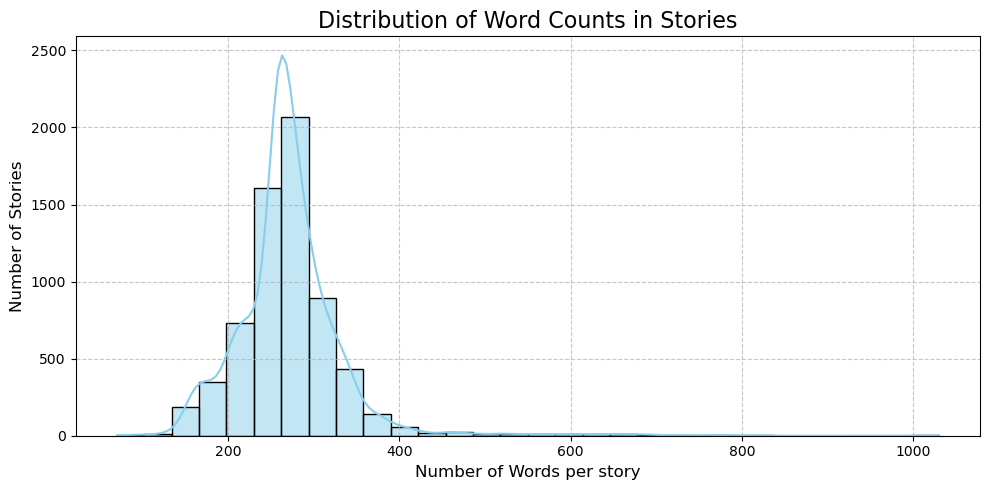

Total number of unique stories: 6605
Average word count per story: 270.81
Maximum word count: 1030
Minimum word count: 70


In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame from the previous steps

# Function to count words in a string
def word_count(string):
    return len(string.split())

# Get unique stories and their word counts
unique_stories = df['story'].unique()
story_word_counts = [word_count(story) for story in unique_stories]

# Calculate statistics
avg_words = sum(story_word_counts) / len(story_word_counts)
max_words = max(story_word_counts)
min_words = min(story_word_counts)

# Create the plot
plt.figure(figsize=(10, 5))

# Create a histogram with KDE
sns.histplot(story_word_counts, kde=True, bins=30, color='skyblue', edgecolor='black')

# Customize the plot
plt.title('Distribution of Word Counts in Stories', fontsize=16)
plt.xlabel('Number of Words per story', fontsize=12)
plt.ylabel('Number of Stories', fontsize=12)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Save the plot as an image file
#plt.savefig('/Users/ayushsh/Documents/MS-LJMU/datasets/QnA/story_word_count_distribution.png')

# Print statistics
print(f"Total number of unique stories: {len(unique_stories)}")
print(f"Average word count per story: {avg_words:.2f}")
print(f"Maximum word count: {max_words}")
print(f"Minimum word count: {min_words}")

Seeing above, the average word count per story is 270.81. In order to have reasonale amount of context, we will get all stories with word count 280 words and above for analysis.

### Getting all stories with word count 280 and less than 400

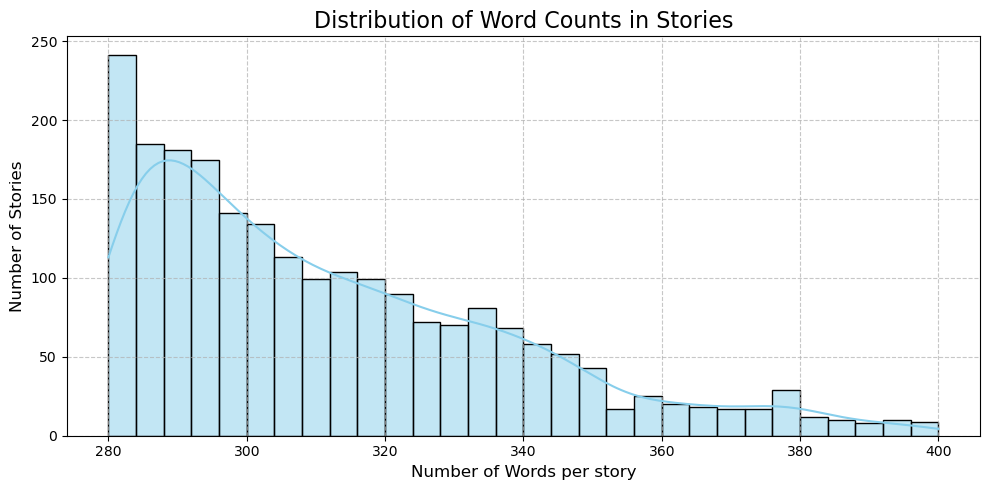

Total number of unique stories: 2198
Total number of unique IDs: 2400
Average word count per story: 311.88
Maximum word count per story: 400
Minimum word count per story: 280


In [64]:
# Function to count words in a string
def word_count(string):
    return len(str(string).split())

# Create a new DataFrame with story_word_count column
df_with_word_count = df.copy()
df_with_word_count['story_word_count'] = df_with_word_count['story'].apply(word_count)

# Filter for stories with more than 300 words
df_long_stories = df_with_word_count[(df_with_word_count['story_word_count'] >= 280) & (df_with_word_count['story_word_count'] <= 400)]

# Reset the index of the new DataFrame
df_long_stories = df_long_stories.reset_index(drop=True)

# Get unique stories and their word counts
unique_stories = df_long_stories['story'].unique()
story_word_counts = [word_count(story) for story in unique_stories]

# Calculate statistics
avg_words = sum(story_word_counts) / len(story_word_counts)
max_words = max(story_word_counts)
min_words = min(story_word_counts)

# Create the plot
plt.figure(figsize=(10, 5))

# Create a histogram with KDE
sns.histplot(story_word_counts, kde=True, bins=30, color='skyblue', edgecolor='black')

# Customize the plot
plt.title('Distribution of Word Counts in Stories', fontsize=16)
plt.xlabel('Number of Words per story', fontsize=12)
plt.ylabel('Number of Stories', fontsize=12)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Print statistics
print(f"Total number of unique stories: {len(unique_stories)}")
unique_ids = df_long_stories['id'].unique()
print(f"Total number of unique IDs: {len(unique_ids)}")
print(f"Average word count per story: {avg_words:.2f}")
print(f"Maximum word count per story: {max_words}")
print(f"Minimum word count per story: {min_words}")


### Remove rows where answer_text is 'yes' or 'no' (case-insensitive)

In [65]:
# Remove rows where answer_text is 'yes' or 'no' (case-insensitive)
df = df_long_stories[~df_long_stories['answer_text'].str.lower().isin(['yes', 'no'])]

# Reset the index of the new DataFrame
df = df.reset_index(drop=True)

In [66]:
# Get unique IDs and unique stories count
unique_ids = df['id'].unique()
unique_stories = df['story'].unique()

# Print the number of unique IDs
print(f"Number of unique IDs: {len(unique_ids)}")

# Print the number of unique stories
print(f"Number of unique stories: {len(unique_stories)}")

Number of unique IDs: 2398
Number of unique stories: 2198


In [67]:
df.columns

Index(['id', 'turn_id', 'question', 'answer_text', 'story',
       'story_word_count'],
      dtype='object')

We can see that a single unique story can have multiple unique IDs. For the sake of simplicity and make 1:1 mapping, we will remove all stories with multiple unique IDs. 

### Creating dataframe after removing all stories with multiple IDs.

In [68]:
# Group by story and get the count of unique IDs
story_id_counts = df.groupby('story')['id'].nunique().reset_index(name='id_count')

# Merge this information back to the original DataFrame
df_with_id_counts = df.merge(story_id_counts, on='story')

# Filter for stories with exactly one unique ID
single_id_stories = df_with_id_counts[df_with_id_counts['id_count'] == 1]

# Select only the required columns
df = single_id_stories[['id', 'turn_id', 'question', 'answer_text', 'story', 'story_word_count']]

# Reset the index
df = df.reset_index(drop=True)

# Print some statistics
print(f"Total number of stories with exactly one unique ID: {df['story'].nunique()}")

# Calculate word count statistics
avg_word_count = df['story_word_count'].mean()
max_word_count = df['story_word_count'].max()
min_word_count = df['story_word_count'].min()

print(f"\nAverage word count in single ID stories: {avg_word_count:.2f}")
print(f"Maximum word count in single ID stories: {max_word_count}")
print(f"Minimum word count in single ID stories: {min_word_count}")

Total number of stories with exactly one unique ID: 2037

Average word count in single ID stories: 311.72
Maximum word count in single ID stories: 400
Minimum word count in single ID stories: 280


### Calculating number of turns per story after removing yes/no answers.

Now we will calculate the number of turns per unique ID after removing rows with only yes/no and create a bar plot with the `number of unique IDs` at `y axis` and `Number of turns per unique ID` at `x axis`

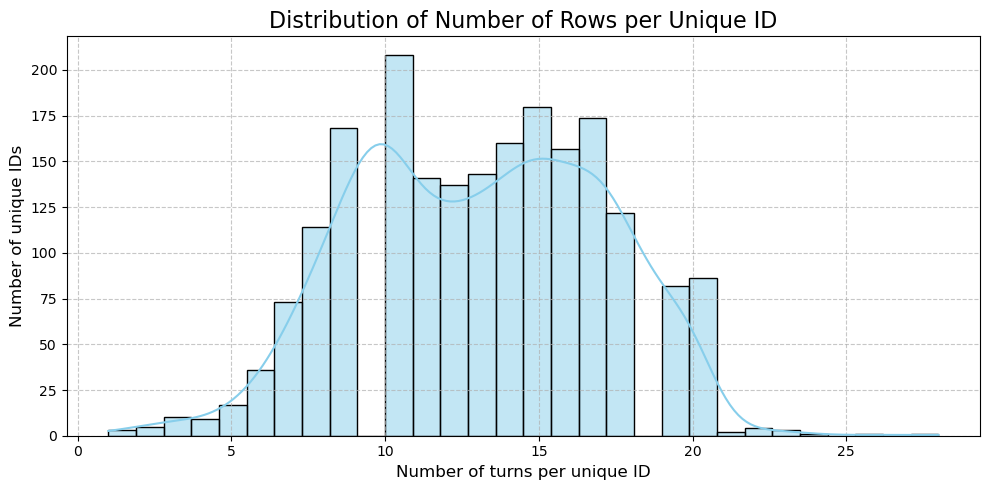

Total number of unique IDs: 2037
Average rows per ID: 13.06
Median rows per ID: 13.00
Minimum rows per ID: 1
Maximum rows per ID: 28


In [69]:
# Calculate the count of rows for each unique ID
id_counts = df['id'].value_counts()

# Create the plot
plt.figure(figsize=(10, 5))

# Create a histogram with KDE
sns.histplot(id_counts, kde=True, bins=30, color='skyblue', edgecolor='black')

# Customize the plot
plt.title('Distribution of Number of Rows per Unique ID', fontsize=16)
plt.xlabel('Number of turns per unique ID', fontsize=12)
plt.ylabel('Number of unique IDs', fontsize=12)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Print some statistics
print(f"Total number of unique IDs: {len(id_counts)}")
print(f"Average rows per ID: {id_counts.mean():.2f}")
print(f"Median rows per ID: {id_counts.median():.2f}")
print(f"Minimum rows per ID: {id_counts.min()}")
print(f"Maximum rows per ID: {id_counts.max()}")

Following above, we can see that after removing yes/no answers, the average total number of turns per unique ID is around 13.06 and median of 13. We will take the number of turns per unique ID between 7 and 20.

### Creating dataframe with number of turns per unique ID between 7 and 20

In [70]:
# Count the number of rows for each unique ID
id_counts = df['id'].value_counts()

# Filter for IDs with between 7 and 20 rows
filtered_ids = id_counts[(id_counts >= 7) & (id_counts <= 20)]

# Create a new DataFrame with only the rows corresponding to these IDs
filtered_df = df[df['id'].isin(filtered_ids.index)]

# Sort the DataFrame by 'id' and 'turn_id'
df = filtered_df.sort_values(['id', 'turn_id'])

# Reset the index
df = filtered_df.reset_index(drop=True)

In [71]:
# Print some statistics
print(f"Number of unique IDs with 7-20 rows: {df['id'].nunique()}")
print(f"Total number of rows in the filtered DataFrame: {len(df)}")

# Calculate some statistics about the number of rows per ID in the filtered set
rows_per_id = df['id'].value_counts()
avg_rows = rows_per_id.mean()
median_rows = rows_per_id.median()

print(f"\nAverage number of rows per ID: {avg_rows:.2f}")
print(f"Median number of rows per ID: {median_rows:.2f}")

Number of unique IDs with 7-20 rows: 1945
Total number of rows in the filtered DataFrame: 25953

Average number of rows per ID: 13.34
Median number of rows per ID: 13.00


In [72]:
output_path = 'dataset/coqa-train-v1.0-new.csv'
df.to_csv(output_path, index=False)

### Rearranging the turn_id for removing any misplaced turn number.

In [73]:
# Function to rearrange turn_id for a group
def rearrange_turn_id(group):
    group = group.sort_values('turn_id')  # Sort by original turn_id
    group['new_turn_id'] = range(1, len(group) + 1)  # Assign new turn_id
    return group

# Group by 'id' and apply the rearrange_turn_id function
df_rearranged = df.groupby('id').apply(rearrange_turn_id).reset_index(drop=True)

# Replace the original turn_id with the new one
df_rearranged['turn_id'] = df_rearranged['new_turn_id']
df_rearranged = df_rearranged.drop('new_turn_id', axis=1)

# Sort the DataFrame by 'id' and 'turn_id'
df_rearranged = df_rearranged.sort_values(['id', 'turn_id'])

# Reset the index
df = df_rearranged.reset_index(drop=True)

output_path = 'dataset/coqa-train-v1.0-rearranged.csv'
df.to_csv(output_path, index=False)

/tmp/ipykernel_14442/3295739112.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_rearranged = df.groupby('id').apply(rearrange_turn_id).reset_index(drop=True)


In [74]:
# Get unique stories
unique_stories = df['story'].unique()

output_path = 'dataset/all_stories.txt'

# Write stories to the text file
with open(output_path, 'w', encoding='utf-8') as f:
    for i, story in enumerate(unique_stories, 1):
        f.write(f"Story {i}:\n{story}\n\n")  # Add story number and extra newline for readability

In [75]:
unique_stories_count = df['story'].nunique()

In [76]:
unique_stories_count

1945

#### Get the rearranged final dataframe for calculating different metrics and provide the start index and end index

In [46]:
file_path = 'dataset/coqa-train-v1.0-rearranged.csv'
df_main = pd.read_csv(file_path)

In [47]:
start_index = 800
end_index = start_index+200

In [48]:
import pandas as pd
import boto3
import time
from concurrent.futures import ThreadPoolExecutor, as_completed
from collections import deque

# Initialize Bedrock client
bedrock_agent = boto3.client('bedrock-agent-runtime')

# Sort the DataFrame by 'id' and 'turn_id'
df_main = df_main.sort_values(['id', 'turn_id'])

# Select start index and end index ids only
unique_ids = df_main['id'].unique()[start_index:end_index]
df = df_main[df_main['id'].isin(unique_ids)]

# Throttling mechanism
class ThrottleManager:
    def __init__(self, max_requests_per_second):
        self.max_requests_per_second = max_requests_per_second
        self.request_times = deque()

    def wait_if_needed(self):
        current_time = time.time()
        while self.request_times and current_time - self.request_times[0] > 1:
            self.request_times.popleft()
        
        if len(self.request_times) >= self.max_requests_per_second:
            sleep_time = 1 - (current_time - self.request_times[0])
            if sleep_time > 0:
                time.sleep(sleep_time)
        
        self.request_times.append(time.time())

# Initialize throttle manager (adjust the rate as needed)
throttle = ThrottleManager(max_requests_per_second=5)

# Function to get answer from Bedrock Knowledge Base for a single turn
def get_knowledge_base_turn_answer(question, story=None, session_id=None):
    throttle.wait_if_needed()
    
    try:
        input_text = f"Context: {story}\n\nQuestion: {question}" if story else question
        kwargs = {
            'input': {'text': input_text},
            'retrieveAndGenerateConfiguration': {
                'type': 'KNOWLEDGE_BASE',
                'knowledgeBaseConfiguration': {
                    'knowledgeBaseId': 'DKYIDXXKW3',
                    'modelArn': 'arn:aws:bedrock:us-east-1::foundation-model/anthropic.claude-3-haiku-20240307-v1:0'
                }
            }
        }
        if session_id:
            kwargs['sessionId'] = session_id
        
        response = bedrock_agent.retrieve_and_generate(**kwargs)
        return response['output']['text'], response.get('sessionId')
    except Exception as e:
        print(f"Error querying Knowledge Base: {str(e)}")
        return f"Error: {str(e)}", None

# Function to process a single unique ID
def process_unique_id(group):
    results = []
    story = group['story'].iloc[0]  # Assuming story is the same for all turns of a unique ID
    session_id = None
    
    for index, row in group.iterrows():
        is_first_turn = index == group.index[0]
        answer, new_session_id = get_knowledge_base_turn_answer(
            row['question'], 
            story if is_first_turn else None, 
            session_id
        )
        results.append((row['id'], row['turn_id'], answer))
        
        # Update session_id for next turn if it's the first turn
        if is_first_turn and new_session_id:
            session_id = new_session_id
    
    return results

# Process the selected unique IDs
all_results = []

with ThreadPoolExecutor(max_workers=5) as executor:
    future_to_id = {executor.submit(process_unique_id, df[df['id'] == uid]): uid for uid in unique_ids}
    for future in as_completed(future_to_id):
        uid = future_to_id[future]
        try:
            all_results.extend(future.result())
        except Exception as exc:
            print(f'ID {uid} generated an exception: {exc}')

# Update the DataFrame with results
for uid, turn_id, answer in all_results:
    df.loc[(df['id'] == uid) & (df['turn_id'] == turn_id), 'knowledge_base_answer'] = answer

# Save the updated DataFrame
dataframe_name = f"qa_data_with_contextual_answers_{start_index}_{end_index}_ids.csv"
df.to_csv(f'dataframe/{dataframe_name}', index=False)

print("Processing complete. Results saved to 'qa_data_with_contextual_answers_100_200_ids.csv'")

# Print some statistics
print(f"\nTotal questions processed: {len(df)}")
print(f"Unique IDs (sessions) processed: {df['id'].nunique()}")

# Optionally, print a sample of the results
#print("\nSample of results:")
#print(df[['id', 'turn_id', 'question', 'knowledge_base_answer']].head(10))

# Analyze session lengths
session_lengths = df.groupby('id').size()
print(f"\nAverage turns per session: {session_lengths.mean():.2f}")
print(f"Median turns per session: {session_lengths.median():.2f}")
print(f"Max turns in a session: {session_lengths.max()}")
print(f"Min turns in a session: {session_lengths.min()}")

/tmp/ipykernel_25911/2789886842.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[(df['id'] == uid) & (df['turn_id'] == turn_id), 'knowledge_base_answer'] = answer


Processing complete. Results saved to 'qa_data_with_contextual_answers_100_200_ids.csv'

Total questions processed: 2611
Unique IDs (sessions) processed: 200

Average turns per session: 13.05
Median turns per session: 13.00
Max turns in a session: 20
Min turns in a session: 7


#### Combining all dataset csv files to a single file for further processing.

In [1]:
import os
import pandas as pd

directory = 'dataframe'

# Create an empty list to store the DataFrames
dfs = []

# Loop through all files in the directory
for filename in os.listdir(directory):
    # Check if the file is a CSV file
    if filename.endswith('.csv'):
        # Construct the full file path
        file_path = os.path.join(directory, filename)
        
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        
        # Append the DataFrame to the list
        dfs.append(df)

# Concatenate all the DataFrames in the list
merged_df = pd.concat(dfs, ignore_index=True)

merged_df.to_csv("dataframe/combined/combined_dataset_0_1000.csv")

#### Creating a piechart for distribution of answers that are provided by knowledge base.

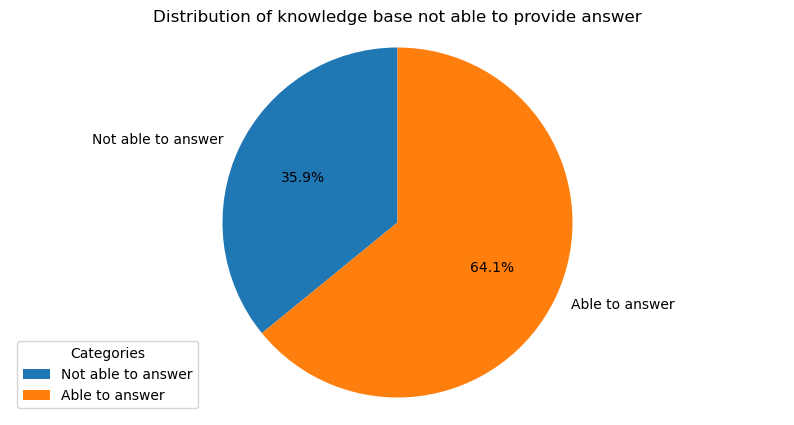

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'df' and a column named 'column_name'
specific_value = "Sorry, I am unable to assist you with this request."

# Count the occurrences of the specific value
specific_count = merged_df['knowledge_base_answer'].value_counts()[specific_value]

# Calculate the total number of rows
total_count = len(merged_df)

# Calculate the count of other values
other_count = total_count - specific_count

# Create a series with the counts
counts = pd.Series([specific_count, other_count], 
                   index=[ "Not able to answer", 'Able to answer'])

# Create the pie chart
plt.figure(figsize=(10, 5))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title(f'Distribution of knowledge base not able to provide answer')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Add a legend
plt.legend(title="Categories",loc='lower left')

# Show the plot
plt.show()


In [4]:
file_path = 'dataframe/combined/combined_dataset_0_1000.csv'
df = pd.read_csv(file_path)

#### Calculating BLEU score

In [5]:
#!pip install nltk

In [11]:
import nltk
from nltk.translate.bleu_score import sentence_bleu
from nltk.tokenize import word_tokenize

# Function to calculate BLEU score
def calculate_bleu(reference, candidate):
    reference = str(reference)
    candidate = str(candidate)
    
    reference_tokens = word_tokenize(reference.lower())
    candidate_tokens = word_tokenize(candidate.lower())
    return round(sentence_bleu([reference_tokens], candidate_tokens),2)

# Calculate BLEU scores
df['bleu_score'] = df.apply(lambda row: calculate_bleu(row['answer_text'], row['knowledge_base_answer']), axis=1)

#### Calculating Similarity score using `paraphrase-MiniLM-L6-v2` hugging face model

In [7]:
#!pip install sentence-transformers 

In [12]:
from sentence_transformers import SentenceTransformer
# Load pre-trained sentence transformer model
model = SentenceTransformer(model_name_or_path='paraphrase-MiniLM-L6-v2')

def sentence_similarity(sentence1, sentence2):
    # Sentences we want to encode
    sentence1 = str(sentence1)
    sentence2 = str(sentence2)
    encodded_sentence_1 = model.encode(sentence1)
    encodded_sentence_2 = model.encode(sentence2)
    # Compute cosine similarities
    similarities = model.similarity(encodded_sentence_1, encodded_sentence_2)
    return round(similarities.item(),2)

# Calculate similarity scores
df['similarity_score'] = df.apply(lambda row: sentence_similarity(row['answer_text'], row['knowledge_base_answer']), axis=1)

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [13]:
df.to_csv('dataframe/evaluation/qa_answers_0_1000_ids_bleu_similarity_score.csv', index=False)

#### Calculating ROGUE S F1 score with max gap as 6

In [14]:
import pandas as pd
from collections import Counter

def rouge_s_f1(reference, hypothesis, max_gap=4):
    """
    Calculate ROUGE-S F1 score for a single pair of strings.
    
    :param reference: Reference string
    :param hypothesis: Hypothesis string
    :param max_gap: Maximum gap between words in skip-bigrams
    :return: ROUGE-S F1 score
    """
    def get_skip_bigrams(sentence, max_gap):
        words = sentence.split()
        skip_bigrams = []
        for i, word in enumerate(words):
            for j in range(i + 1, min(i + max_gap + 1, len(words))):
                skip_bigrams.append((word, words[j]))
        return Counter(skip_bigrams)
    
    ref_bigrams = get_skip_bigrams(reference, max_gap)
    hyp_bigrams = get_skip_bigrams(hypothesis, max_gap)
    
    common_bigrams = sum((ref_bigrams & hyp_bigrams).values())
    
    if len(ref_bigrams) == 0 or len(hyp_bigrams) == 0:
        return 0.0
    
    precision = common_bigrams / len(hyp_bigrams)
    recall = common_bigrams / len(ref_bigrams)
    
    if precision + recall == 0:
        return 0.0
    
    f1 = 2 * (precision * recall) / (precision + recall)
    return round(f1,2)

def calculate_rouge_s_f1(df, col1, col2, max_gap=6, new_col_name='ROUGE_S_F1'):
    """
    Calculate ROUGE-S F1 scores for two columns in a DataFrame and add the scores as a new column.
    
    :param df: pandas DataFrame containing the text columns
    :param col1: name of the first column (reference)
    :param col2: name of the second column (hypothesis)
    :param max_gap: Maximum gap between words in skip-bigrams
    :param new_col_name: Name of the new column to store ROUGE-S F1 scores
    :return: DataFrame with the new column containing ROUGE-S F1 scores
    """
    def calculate_score(row):
        reference = row[col1]
        hypothesis = row[col2]
        
        # Skip rows with empty strings or non-string values
        if not isinstance(reference, str) or not isinstance(hypothesis, str):
            return None
        
        try:
            return rouge_s_f1(reference, hypothesis, max_gap)
        except Exception as e:
            print(f"Error processing row: {e}")
            return None
    
    # Calculate ROUGE-S F1 scores and add them as a new column
    df[new_col_name] = df.apply(calculate_score, axis=1)
    
    return df

# Calculate ROUGE-S F1 scores and add them to the DataFrame
df = calculate_rouge_s_f1(df, 'answer_text', 'knowledge_base_answer')

#df.to_csv('dataset/qa_answers_100_200_ids_bleu_rogue.csv', index=False)

#### Calculating METEOR score

In [15]:
import pandas as pd
import nltk
from nltk.translate import meteor_score
from nltk.tokenize import word_tokenize

# Download required NLTK data
nltk.download('punkt', quiet=True)
nltk.download('wordnet', quiet=True)

def calculate_meteor_scores(df, col1, col2, new_col_name='METEOR_Score'):
    """
    Calculate METEOR scores for two columns in a DataFrame and store the scores in a new column.
    
    :param df: pandas DataFrame containing the text columns
    :param col1: name of the first column (reference)
    :param col2: name of the second column (hypothesis)
    :param new_col_name: name of the new column to store METEOR scores
    :return: DataFrame with the new column containing METEOR scores
    """
    def compute_meteor(row):
        reference = row[col1]
        hypothesis = row[col2]
        
        # Skip rows with empty strings or non-string values
        if not isinstance(reference, str) or not isinstance(hypothesis, str):
            return None
        
        try:
            # Tokenize the strings
            reference_tokens = word_tokenize(reference)
            hypothesis_tokens = word_tokenize(hypothesis)
            
            # Calculate METEOR score
            score = meteor_score.meteor_score([reference_tokens], hypothesis_tokens)
            return round(score,2)
        except Exception as e:
            print(f"Error processing row: {e}")
            return None
    
    # Calculate METEOR scores and add them as a new column
    df[new_col_name] = df.apply(compute_meteor, axis=1)
    
    return df

# Calculate METEOR scores and add them to the DataFrame
df = calculate_meteor_scores(df, 'answer_text', 'knowledge_base_answer')

In [16]:
df.to_csv('dataframe/combined/merge_df_0_1000_all_metrics.csv', index=False)

In [17]:
df.shape

(13222, 12)

Removing all rows with knowledge_base_answer set to  "Sorry, I am unable to assist you with this request." 

In [18]:
# Remove rows where 'knowledge_base_answer' is the specified string
df = df[df['knowledge_base_answer'] != "Sorry, I am unable to assist you with this request."]

# Reset the index if needed
df = df.reset_index(drop=True)

In [19]:
df.shape

(8476, 12)

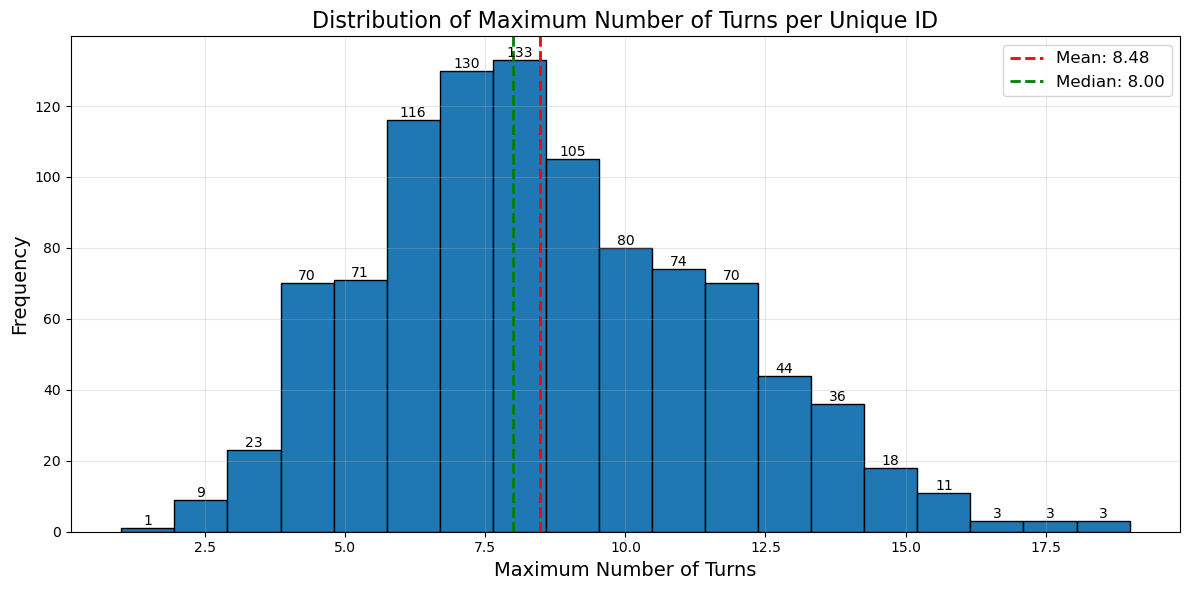

Minimum max turns: 1
Maximum max turns: 19
Total unique IDs: 1000


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming your dataframe is called 'df'
# If not, replace 'df' with your actual dataframe name

# Group by unique ID and count the number of turn_ids, then get the max for each unique ID
max_turns_per_id = df.groupby('id')['turn_id'].nunique()

plt.figure(figsize=(12, 6))

# Create histogram with a maximum of 50 bins
counts, bins, _ = plt.hist(max_turns_per_id, bins=min(50, max_turns_per_id.max()), edgecolor='black')

plt.title('Distribution of Maximum Number of Turns per Unique ID', fontsize=16)
plt.xlabel('Maximum Number of Turns', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.grid(True, alpha=0.3)

# Add some statistics to the plot
mean_turns = max_turns_per_id.mean()
median_turns = max_turns_per_id.median()

plt.axvline(mean_turns, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_turns:.2f}')
plt.axvline(median_turns, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_turns:.2f}')

plt.legend(fontsize=12)

# Add value labels on top of each bar, but only if there are 50 or fewer bars
if len(counts) <= 50:
    for i, count in enumerate(counts):
        plt.text((bins[i] + bins[i+1]) / 2, count, str(int(count)), ha='center', va='bottom')

plt.tight_layout()

# Show the plot
plt.show()

# Print some additional statistics
print(f"Minimum max turns: {max_turns_per_id.min()}")
print(f"Maximum max turns: {max_turns_per_id.max()}")
print(f"Total unique IDs: {len(max_turns_per_id)}")


Above plot shows that the bedrock Knowledge base is able to answer average of 6-10 questions for a unique id.


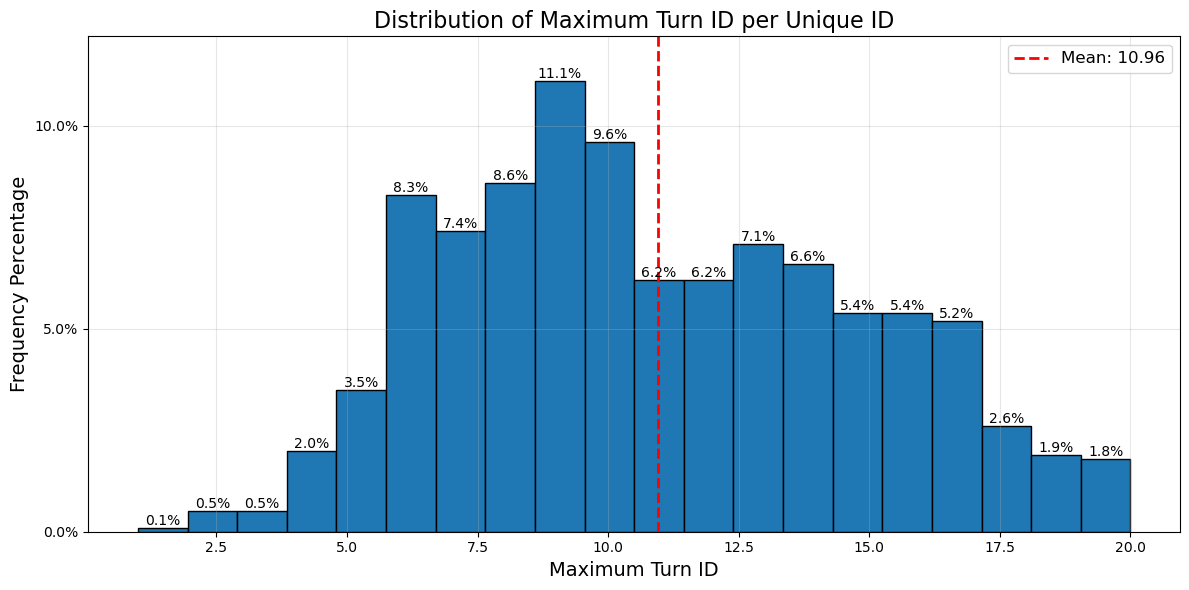

Minimum max turn ID: 1
Maximum max turn ID: 20
Total unique IDs: 1000
Average max turn ID: 10.96
Median max turn ID: 10.00


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming your dataframe is called 'df'
# If not, replace 'df' with your actual dataframe name

# Group by unique ID and get the maximum turn_id for each
max_turn_id_per_unique_id = df.groupby('id')['turn_id'].max()

plt.figure(figsize=(12, 6))

# Create histogram with a maximum of 50 bins
counts, bins, _ = plt.hist(max_turn_id_per_unique_id, bins=min(50, max_turn_id_per_unique_id.max()), 
                           edgecolor='black', weights=np.ones(len(max_turn_id_per_unique_id)) / len(max_turn_id_per_unique_id))

plt.title('Distribution of Maximum Turn ID per Unique ID', fontsize=16)
plt.xlabel('Maximum Turn ID', fontsize=14)
plt.ylabel('Frequency Percentage', fontsize=14)

plt.grid(True, alpha=0.3)

# Add some statistics to the plot
mean_max_turn = max_turn_id_per_unique_id.mean()
median_max_turn = max_turn_id_per_unique_id.median()

plt.axvline(mean_max_turn, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_max_turn:.2f}')

plt.legend(fontsize=12)

# Add percentage labels on top of each bar, but only if there are 50 or fewer bars
if len(counts) <= 50:
    for i, count in enumerate(counts):
        plt.text((bins[i] + bins[i+1]) / 2, count, f'{count*100:.1f}%', ha='center', va='bottom')

plt.ylim(0, max(counts) * 1.1)  # Set y-axis limit to 110% of the maximum percentage
plt.yticks(np.arange(0, max(counts), 0.05), [f'{x*100:.1f}%' for x in np.arange(0, max(counts), 0.05)])

plt.tight_layout()

# Show the plot
plt.show()

# Print some additional statistics
print(f"Minimum max turn ID: {max_turn_id_per_unique_id.min()}")
print(f"Maximum max turn ID: {max_turn_id_per_unique_id.max()}")
print(f"Total unique IDs: {len(max_turn_id_per_unique_id)}")
print(f"Average max turn ID: {mean_max_turn:.2f}")
print(f"Median max turn ID: {median_max_turn:.2f}")


Above graph shows that on an average mostly the maximum turn number is between 7-11 but also there are good percentage of unique Ids having the answer till turn 17. This shows that the bedrock knowledge base is able to answer questions and can maintain context.

#### Getting the number distribution of similarity score, bleu score, METEOR score and ROUGE_S_F1 score with the frequency percentage of rows

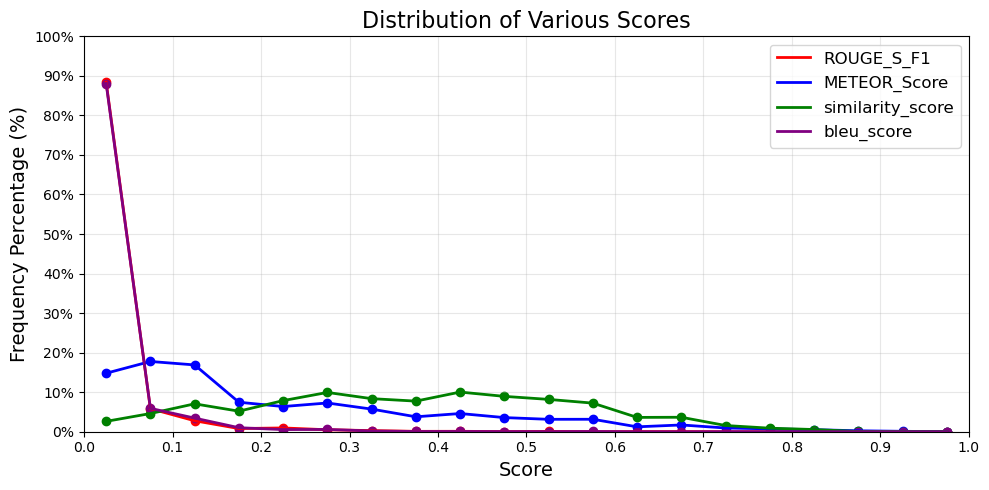

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming your dataframe is called 'df'
# If not, replace 'df' with your actual dataframe name

plt.figure(figsize=(10, 5))

metrics = ['ROUGE_S_F1', 'METEOR_Score', 'similarity_score', 'bleu_score']
colors = ['red', 'blue', 'green', 'purple']

bins = np.linspace(0, 1, 21)  # 20 bins from 0 to 1

for metric, color in zip(metrics, colors):
    # Calculate histogram
    hist, bin_edges = np.histogram(df[metric], bins=bins)
    
    # Calculate bin centers
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Calculate percentage
    total = len(df[metric])
    hist_percentage = (hist / total) * 100
    
    # Plot line
    plt.plot(bin_centers, hist_percentage, label=metric, color=color, linewidth=2)
    
    # Add markers at each data point
    plt.scatter(bin_centers, hist_percentage, color=color)

plt.title('Distribution of Various Scores', fontsize=16)
plt.xlabel('Score', fontsize=14)
plt.ylabel('Frequency Percentage (%)', fontsize=14)
plt.xlim(0, 1)
plt.xticks(np.arange(0, 1.1, 0.1), [f'{i:.1f}' for i in np.arange(0, 1.1, 0.1)], fontsize=10)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)

# Set y-axis to percentage
plt.ylim(0, 100)
plt.yticks(np.arange(0, 101, 10), [f'{i}%' for i in range(0, 101, 10)])

plt.tight_layout()

# Show the plot
plt.show()


Can see that the BLEU score and ROUGE_S_F1 scores performed poorly on the dataset as above 90% of the score is between 0.0 and 0.1. Similarity scores performed the best amongst the 4 metrics discussed with majority of the similarity score beween 0.3 - 0.6. Let's deep dive more on similarity score.

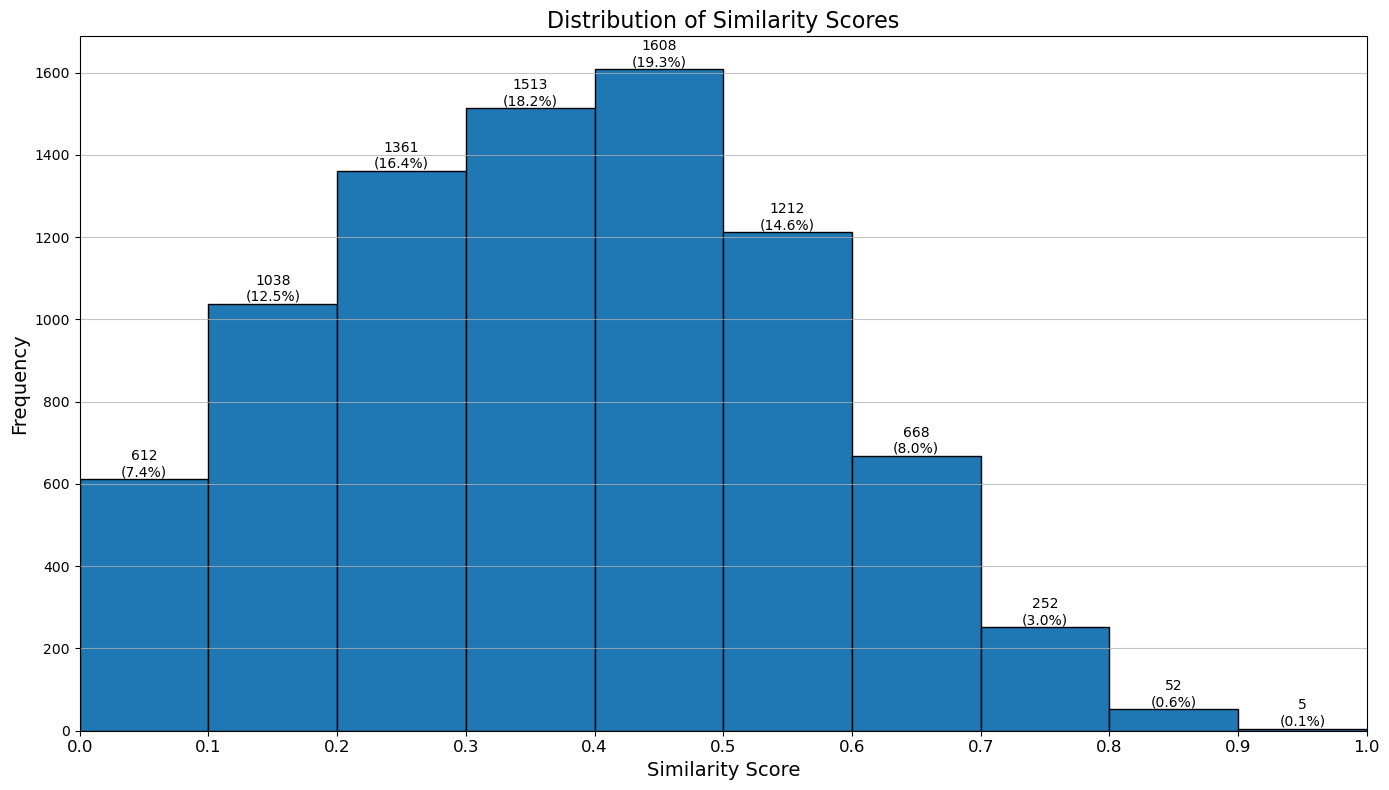

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataframe is called 'df'
# If not, replace 'df' with your actual dataframe name

# Create the histogram
plt.figure(figsize=(14, 8))
bins = [i/10 for i in range(11)]  # Creates bins [0.0, 0.1, 0.2, ..., 0.9, 1.0]
counts, edges, _ = plt.hist(df['similarity_score'], bins=bins, edgecolor='black', align='mid')

# Customize the plot
plt.title('Distribution of Similarity Scores', fontsize=16)
plt.xlabel('Similarity Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xlim(0, 1)

# Set x-ticks to show each 0.1 interval
plt.xticks(bins, [f'{i:.1f}' for i in bins], fontsize=12)

# Add grid lines for better readability
plt.grid(axis='y', alpha=0.75)

# Calculate total number of samples
total_samples = sum(counts)

# Add value labels and percentages on top of each bar
for count, x in zip(counts, edges[:-1]):
    if count > 0:
        percentage = (count / total_samples) * 100
        plt.text(x + 0.05, count, f'{int(count)}\n({percentage:.1f}%)', 
                 ha='center', va='bottom', fontsize=10)

plt.tight_layout()

# Show the plot
plt.show()